In [74]:
import matplotlib.pyplot as plt
from math import *
import numpy as np
from random import randint

In [218]:
def create_points(number,inf=0,sup=50):
    return [[randint(inf,sup),randint(inf,sup)] for i in range(number)]

def polar_angle(p0,p1=None):
    if p1 == None:
        p1 = anchor
    y_span = p0[1] - p1[1]
    x_span = p0[0] - p1[0]
    return atan2(y_span,x_span)


def polar_angle2(p2,p0=None,p1=None):
    if p1 == None:
        p1 = anchor
    if p0 == None:
        p0 = hull[-2]
    if p2 == p1 or p2 ==p0:
        return 0
    vy_span = p1[1] - p0[1]
    vx_span = p1[0] - p0[0]
    
    uy_span = p2[1] - p1[1]
    ux_span = p2[0] - p1[0]
    
    angle = np.dot((vx_span,vy_span),(ux_span,uy_span))
    a = distance(p0)
    b = distance(p2) 
    if b == 0 or a == 0:
        return 0
    return acos(angle/sqrt((a*b)))
    
    
   

def distance(p0,p1 = None):
    if p1 == None:
        p1 = anchor
    y_span = p0[1] - p1[1]
    x_span = p0[0] - p1[0]
    return (x_span**2 + y_span**2)

def hull_plot(pts, convex_hull = None):
    xs,ys = zip(*pts)
    plt.scatter(xs,ys)
    if convex_hull !=None:
        for i in range(1,len(convex_hull)+1):
            if i == len(convex_hull):
                i=0
            c0 = convex_hull[i-1]
            c1 = convex_hull[i]
            plt.plot((c0[0],c1[0]),(c0[1],c1[1]),'r')
    plt.show()

In [191]:
def inicial_point(points):
    Min_ind= None
    for i, (x, y) in enumerate(points):
    
        if Min_ind == None or x < points[Min_ind][0]:
            Min_ind = i
    
        if x ==points[Min_ind][0] and y < points[Min_ind][1]:
            Min_ind = i
    return Min_ind

def quicksort(pts):
    if len(pts) <=1:
        return pts
    smaller, equal, larger = [],[],[]
    pivot = polar_angle(pts[randint(0, len(pts)-1)])
    for pt in pts:
        pt_angle=polar_angle(pt)
        if pt_angle < pivot:
            smaller.append(pt)
        elif pt_angle == pivot:
            equal.append(pt)
        else:
            larger.append(pt)
    
    return quicksort(smaller) + sorted(equal,key=distance) + quicksort(larger)

def quicksort2(pts):
    if len(pts) <=1:
        return pts
    smaller, equal, larger = [],[],[]
    pivot = polar_angle2(pts[randint(0, len(pts)-1)])
    for pt in pts:
        pt_angle=polar_angle2(pt)
        if pt_angle < pivot:
            smaller.append(pt)
        elif pt_angle == pivot:
            equal.append(pt)
        else:
            larger.append(pt)
    
    return quicksort2(smaller) + sorted(equal,key=distance) + quicksort2(larger)

In [259]:
def gift(points,show_progress = False):
    global anchor
    global hull
    min_index= inicial_point(points)
    anchor = points[min_index]
    sorted_points = quicksort(points)
    del sorted_points[sorted_points.index(anchor)]
    hull = [anchor,sorted_points[-1]]
    hull_plot(points, hull)
    anchor = hull[-1]
    del sorted_points[sorted_points.index(anchor)]
    for s in range(1,len(sorted_points)+1):
        if len(sorted_points) == 1 or anchor == hull[0]:
            #print("s")
            return hull
        sorted_points = quicksort2(sorted_points)
        
        hull.append(sorted_points[0])
        
        #print(sorted_points)
        #print(anchor)
        hull_plot(points, hull)
        anchor = hull[-1]
        if s == 1:
            sorted_points.append(points[inicial_point(points)])
        del sorted_points[sorted_points.index(anchor)]

    

[[13, 36],
 [39, 47],
 [25, 39],
 [32, 35],
 [31, 35],
 [22, 16],
 [18, 11],
 [12, 28],
 [7, 19]]

In [174]:
points = create_points(10)



In [257]:
points2 = create_points(100)

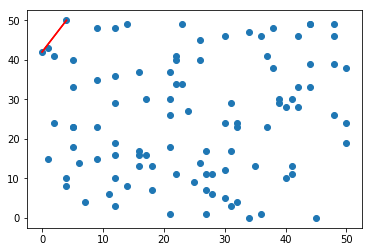

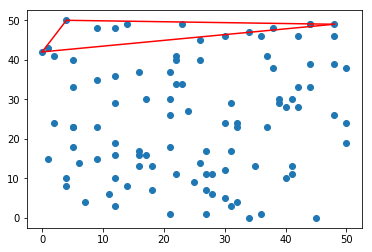

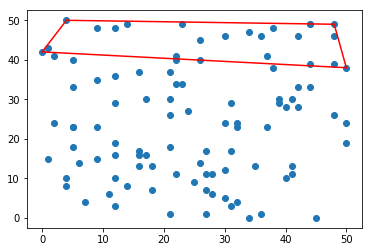

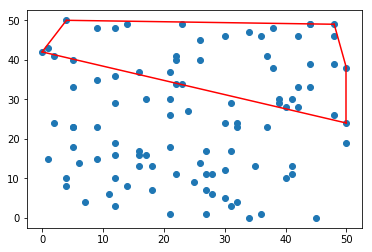

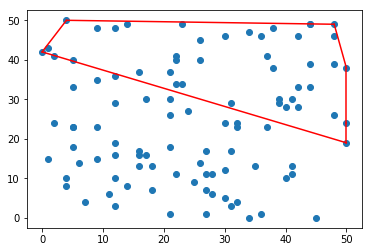

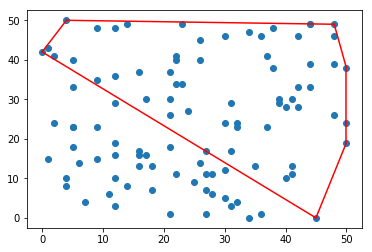

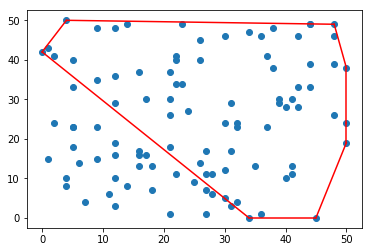

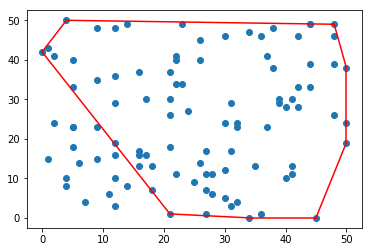

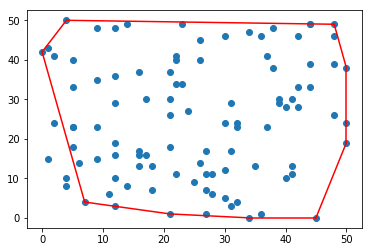

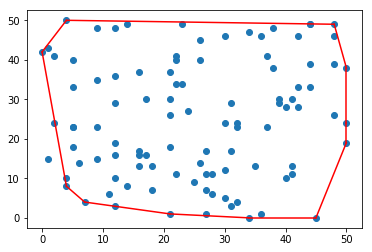

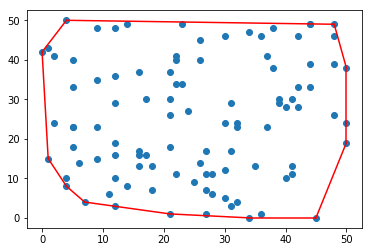

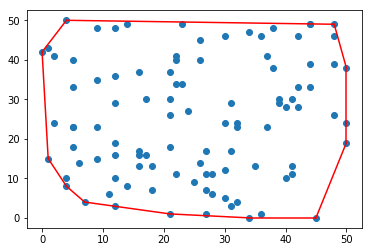

In [260]:
hull = gift(points2)
#hull_plot(points2,hull)